In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Загрузка данных

In [2]:
#%%capture
#!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [4]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [6]:
x.drop('lat', axis = 1, inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [9]:
from sklearn.feature_selection import RFE

In [10]:
y = data['price']
x = data.drop(columns='price')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [12]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

In [13]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [14]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

In [16]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

# <center> Домашнее задание

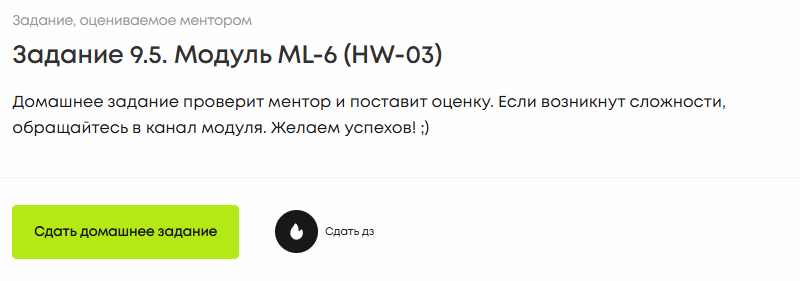

## **Основываясь на описании задания из сообщения ментора: Задача состоит в обучении задачи линейной регрессии на найденных двумя способами трех важных признаков и сравнить полученные результаты.**

In [215]:
# прочитаем исходную таблицы
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head(3)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0


Оставляем только "отобранные важные" признаки и коючевой признак "цена", для преобразования данных обьединим эти списки:

In [216]:
data = data[['year', 'cylinders', 'lat', 'odometer', 'price']]
data.head(3)

,year,cylinders,lat,odometer,price
0,2016,6,36.471500,43500,43900
1,2009,8,40.468826,98131,15490
2,2002,8,42.477134,201803,2495


Построение гистограмм для отобранных признаков

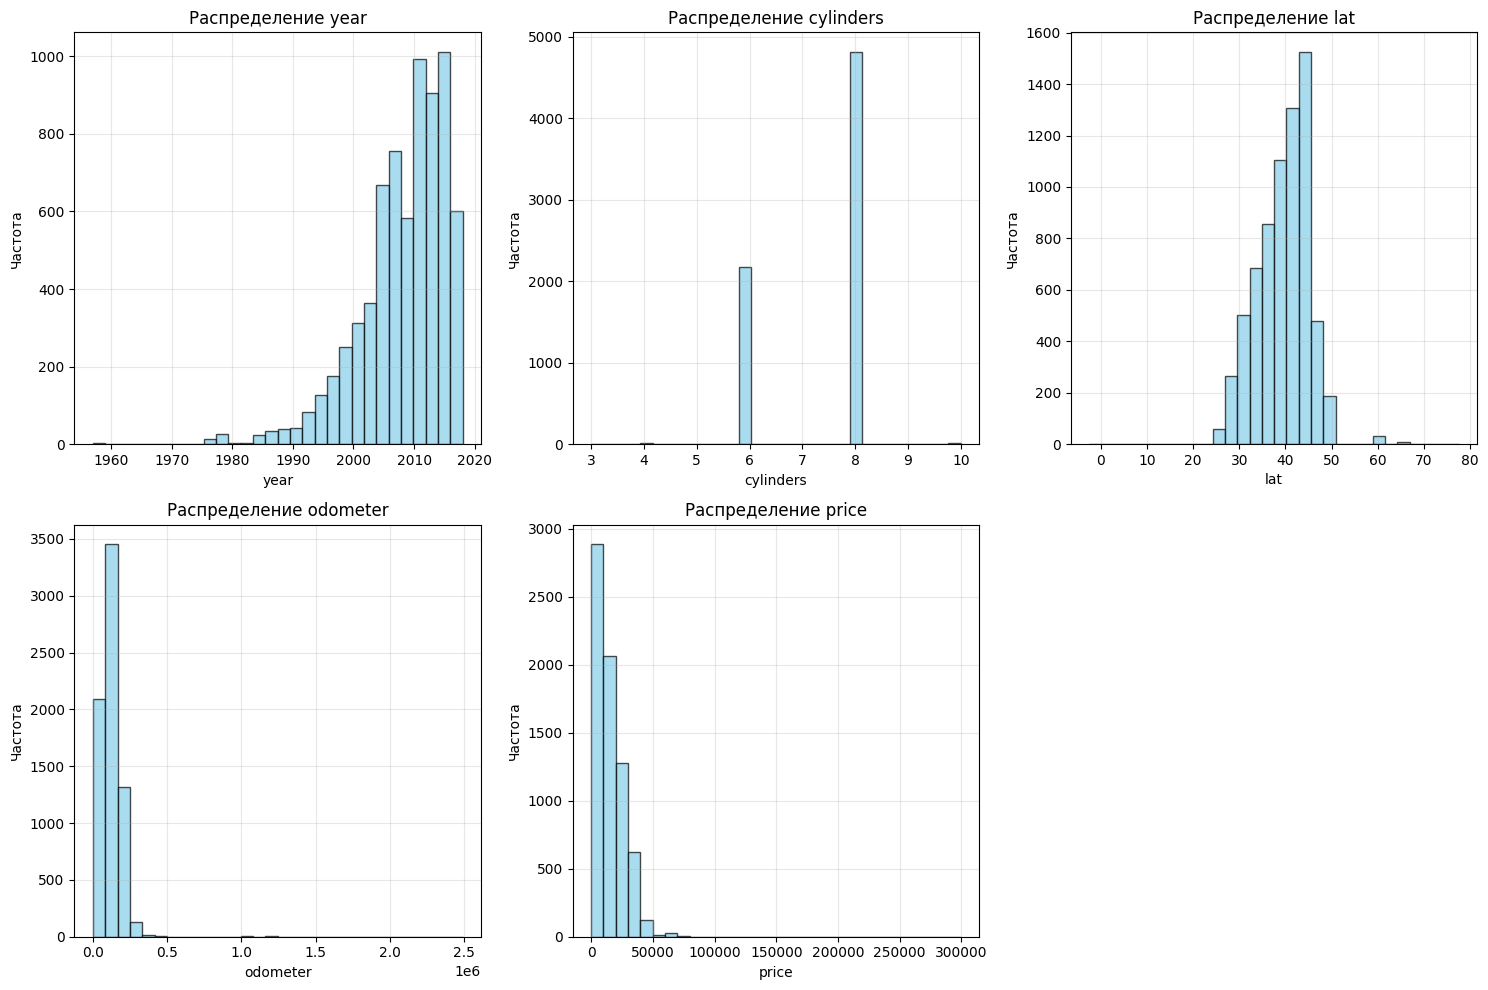

Основная статистика по отобранным признакам:
              year    cylinders          lat      odometer          price
count  7017.000000  7017.000000  7017.000000  7.017000e+03    7017.000000
mean   2007.869745     7.374662    39.550144  1.199787e+05   15121.549523
std       6.975329     0.942928     5.745409  8.992216e+04   11765.423119
min    1957.000000     3.000000    -2.508807  0.000000e+00       1.000000
25%    2004.000000     6.000000    35.661076  7.328500e+04    5995.000000
50%    2010.000000     8.000000    40.335245  1.180000e+05   12750.000000
75%    2013.000000     8.000000    43.582100  1.578040e+05   21995.000000
max    2018.000000    10.000000    77.617682  2.490000e+06  299500.000000


In [217]:
# Построим гистограммы для всех признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Превращаем в одномерный массив для удобства

columns = data.columns
for i, column in enumerate(columns):
    axes[i].hist(data[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)

# Убираем лишний subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Также выведем основную статистику
print("Основная статистика по отобранным признакам:")
print(data.describe())

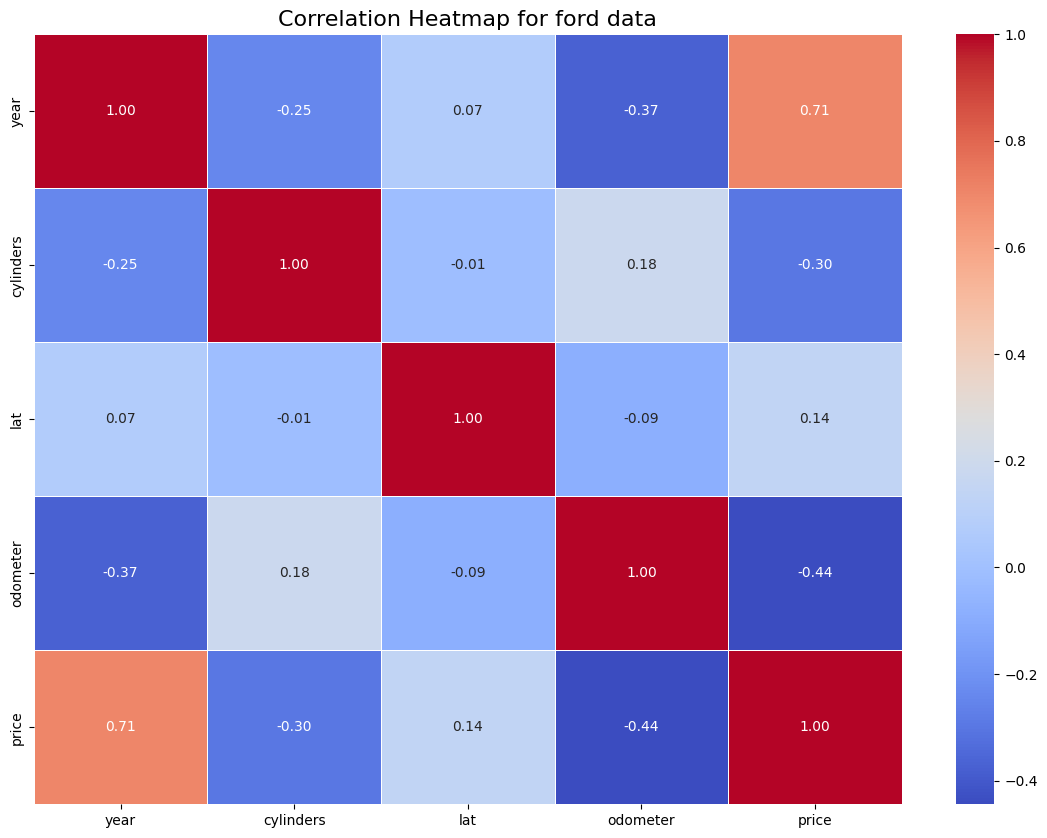

In [218]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

Логарифмического преобразование 'price'

In [219]:
#data['price'] = np.log(data['price'])

# выведем гистограмма
#log_price = data['price']
#plt.hist(log_price)
#plt.title('Трансформированное распределение признака price')
#plt.show()

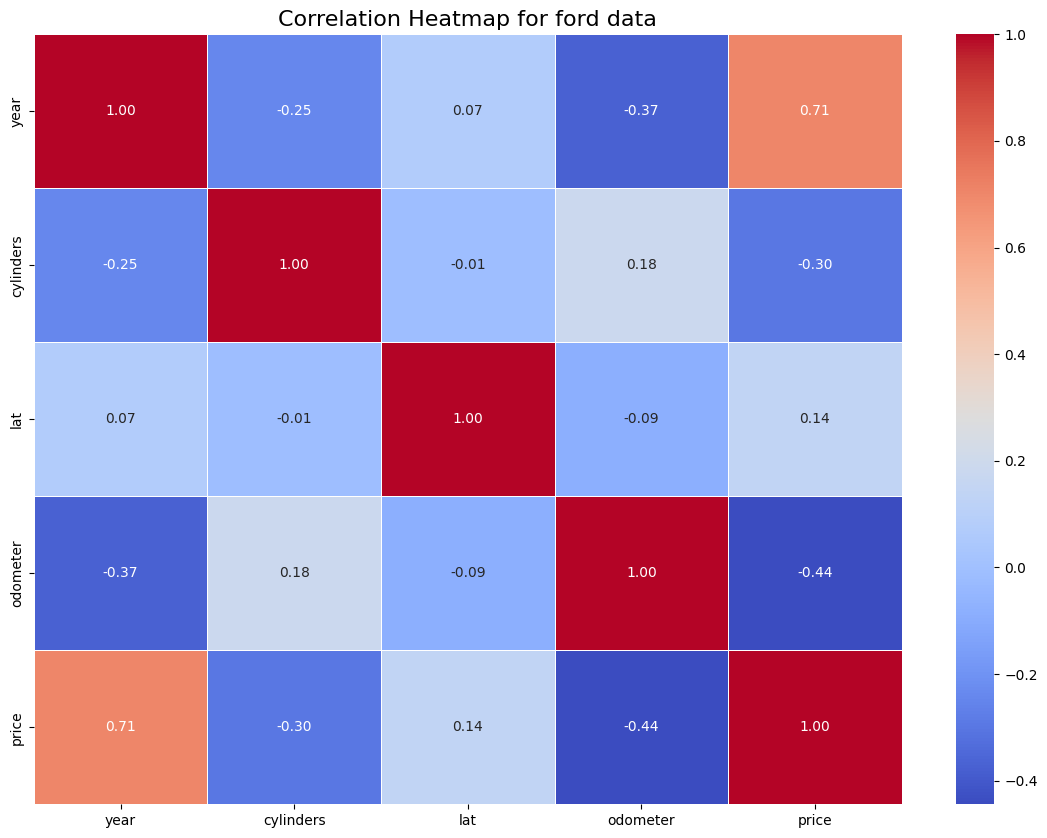

In [220]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

Нормализация методом RobustScaler для 'odometer'

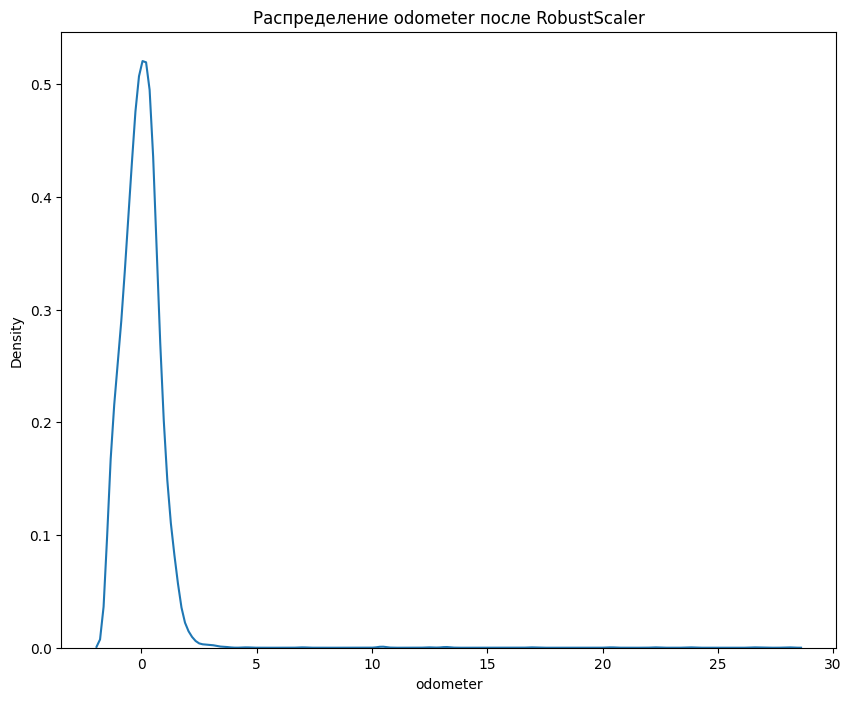

In [221]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Преобразуем в 2D массив для RobustScaler
df = data['odometer'].values.reshape(-1, 1)
df_r = r_scaler.fit_transform(df)

# Преобразуем обратно в DataFrame для визуализации
df_r = pd.DataFrame(df_r, columns=['odometer'])

# Применяем преобразование к исходным данным
data['odometer'] = df_r['odometer'].values

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение odometer после RobustScaler')

sns.kdeplot(data=df_r, x='odometer', ax=ax1)
plt.show()

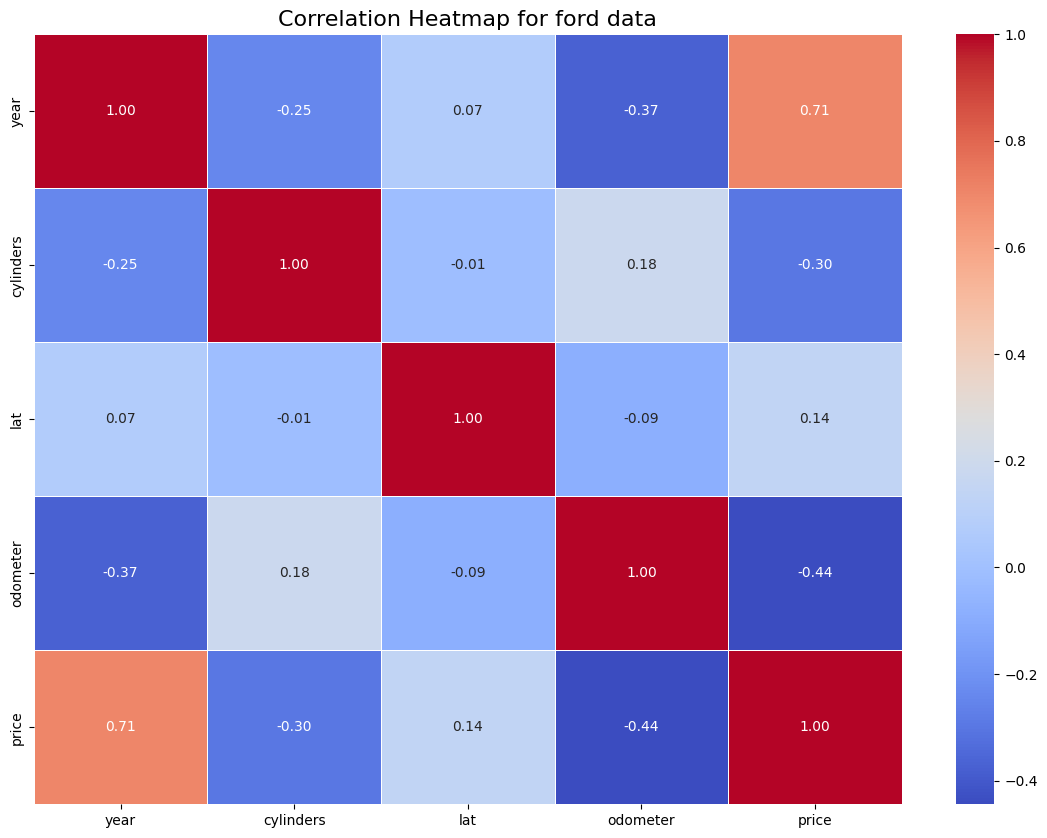

In [222]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

Преобразуем признак 'year'

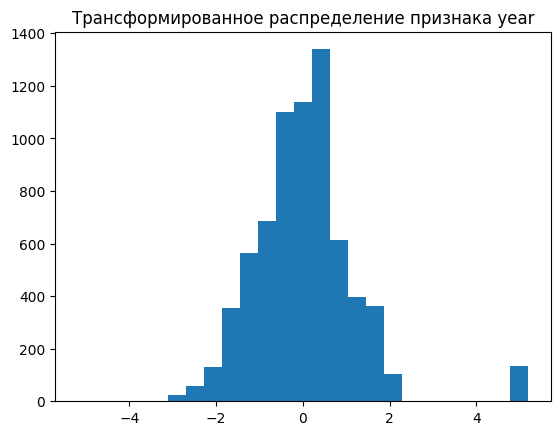

In [223]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

data['year'] = data_transformed.flatten()

 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

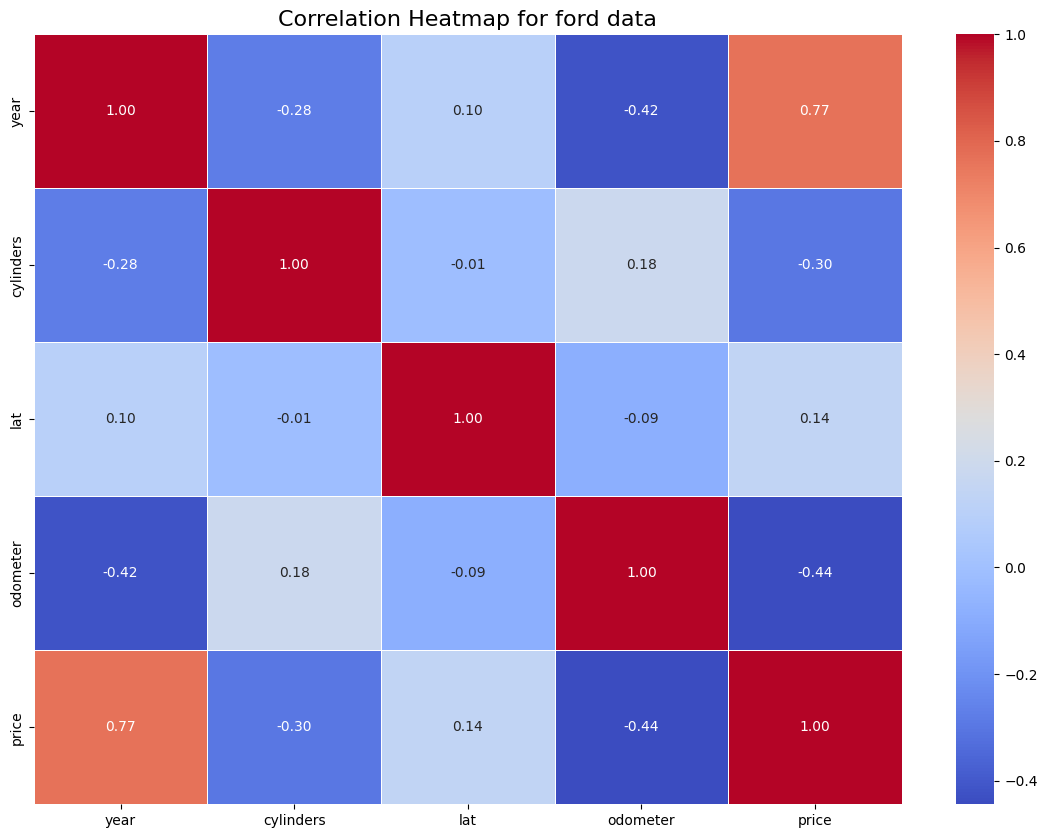

In [224]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

Количество цилиндров является номинальным признаком, закодируем его с помощью OneHotEncoding

In [225]:
one_hot_encoder = OneHotEncoder()
columns_to_change = ['cylinders']
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10']


In [226]:
# Преобразуем numpy array в DataFrame и добавляем к исходным данным
data_onehot_df = pd.DataFrame(data_onehot, columns=column_names, index=data.index)
data = pd.concat([data, data_onehot_df], axis=1)
data.head(3)

,year,cylinders,lat,odometer,price,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10
0,1.558482,6,36.471500,-0.881459,43900,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041413,8,40.468826,-0.235083,15490,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.933910,8,42.477134,0.991529,2495,0.0,0.0,0.0,0.0,1.0,0.0


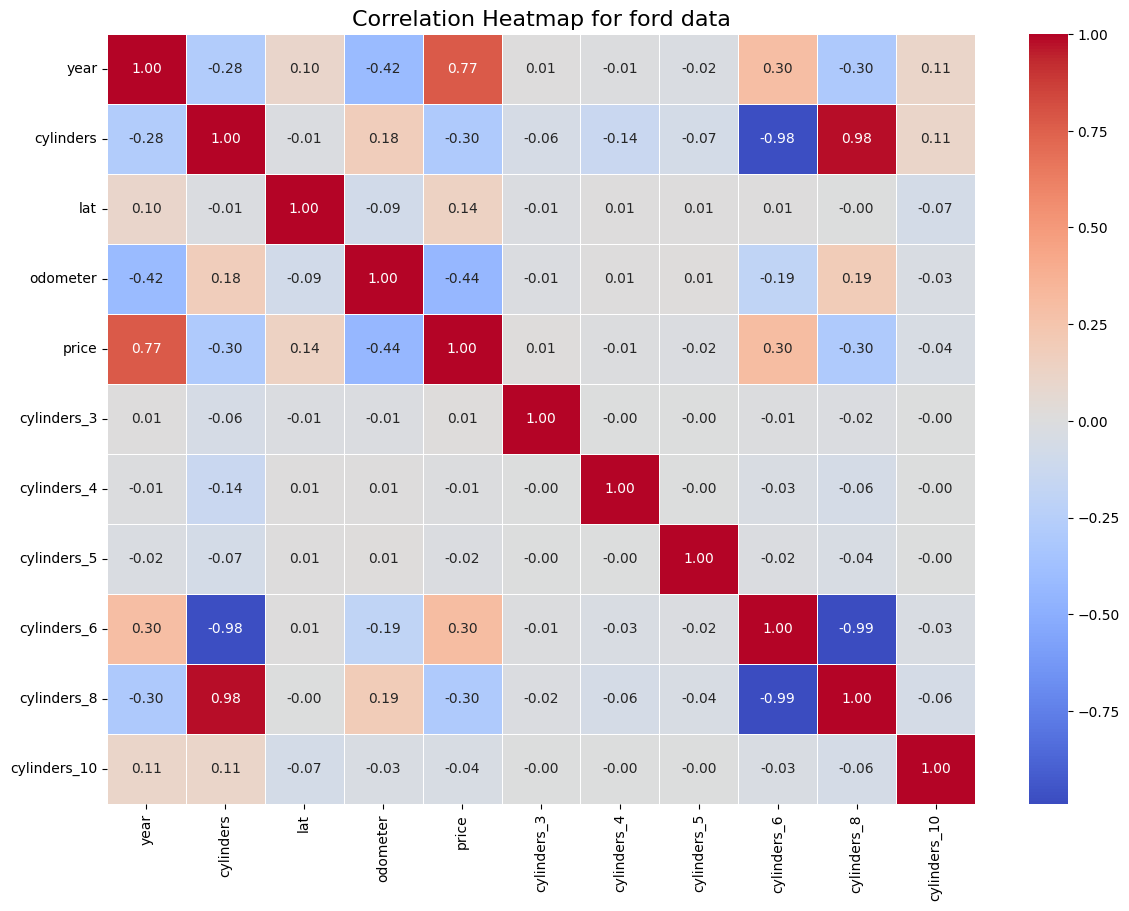

In [227]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

Признаки 6 и 8 цилиндров мультиколлинеарны, вместо OneHotEncoding сделать "is_8_cylinders"

In [228]:
data['is_8_cylinders'] = data['cylinders_8']

# Удаляем избыточные столбцы cylinders (передаем список)
columns_to_drop = ['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'cylinders_10']
data = data.drop(columns_to_drop, axis=1)

# Также удаляем оригинальный столбец cylinders если он остался
data = data.drop('cylinders', axis=1)
    
data.head(3)

,year,lat,odometer,price,is_8_cylinders
0,1.558482,36.471500,-0.881459,43900,0.0
1,-0.041413,40.468826,-0.235083,15490,1.0
2,-0.933910,42.477134,0.991529,2495,1.0


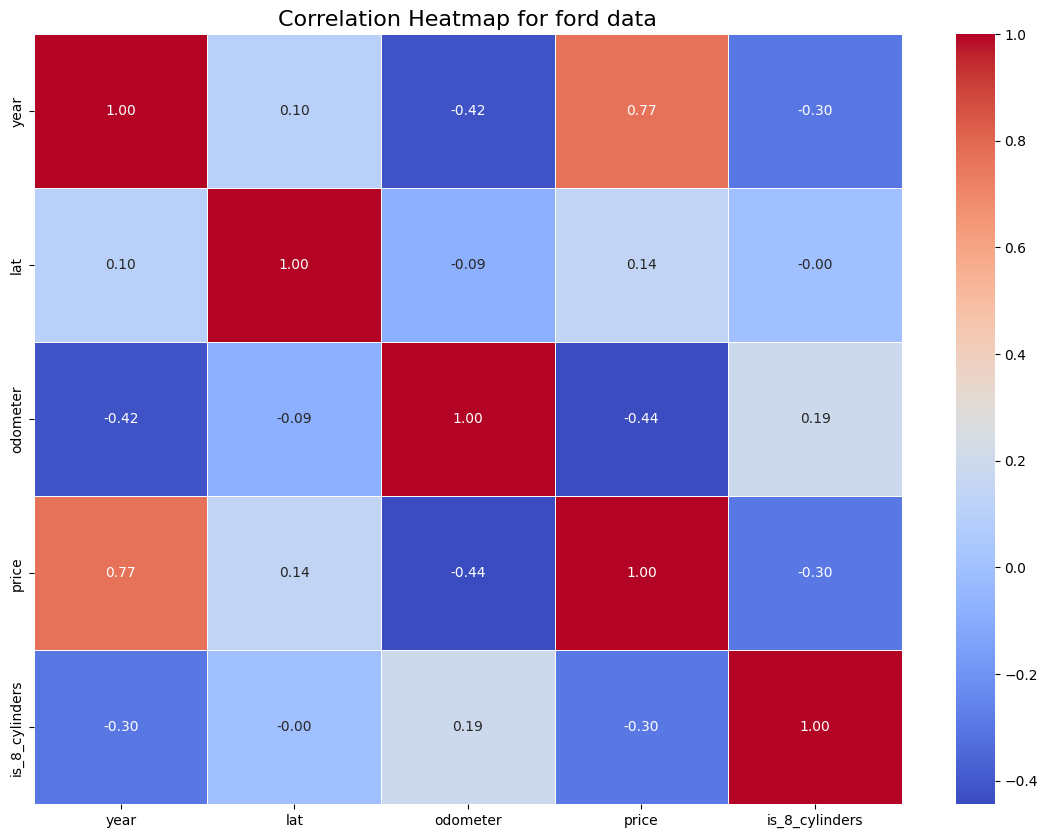

In [229]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for ford data", fontsize=16)
plt.show()

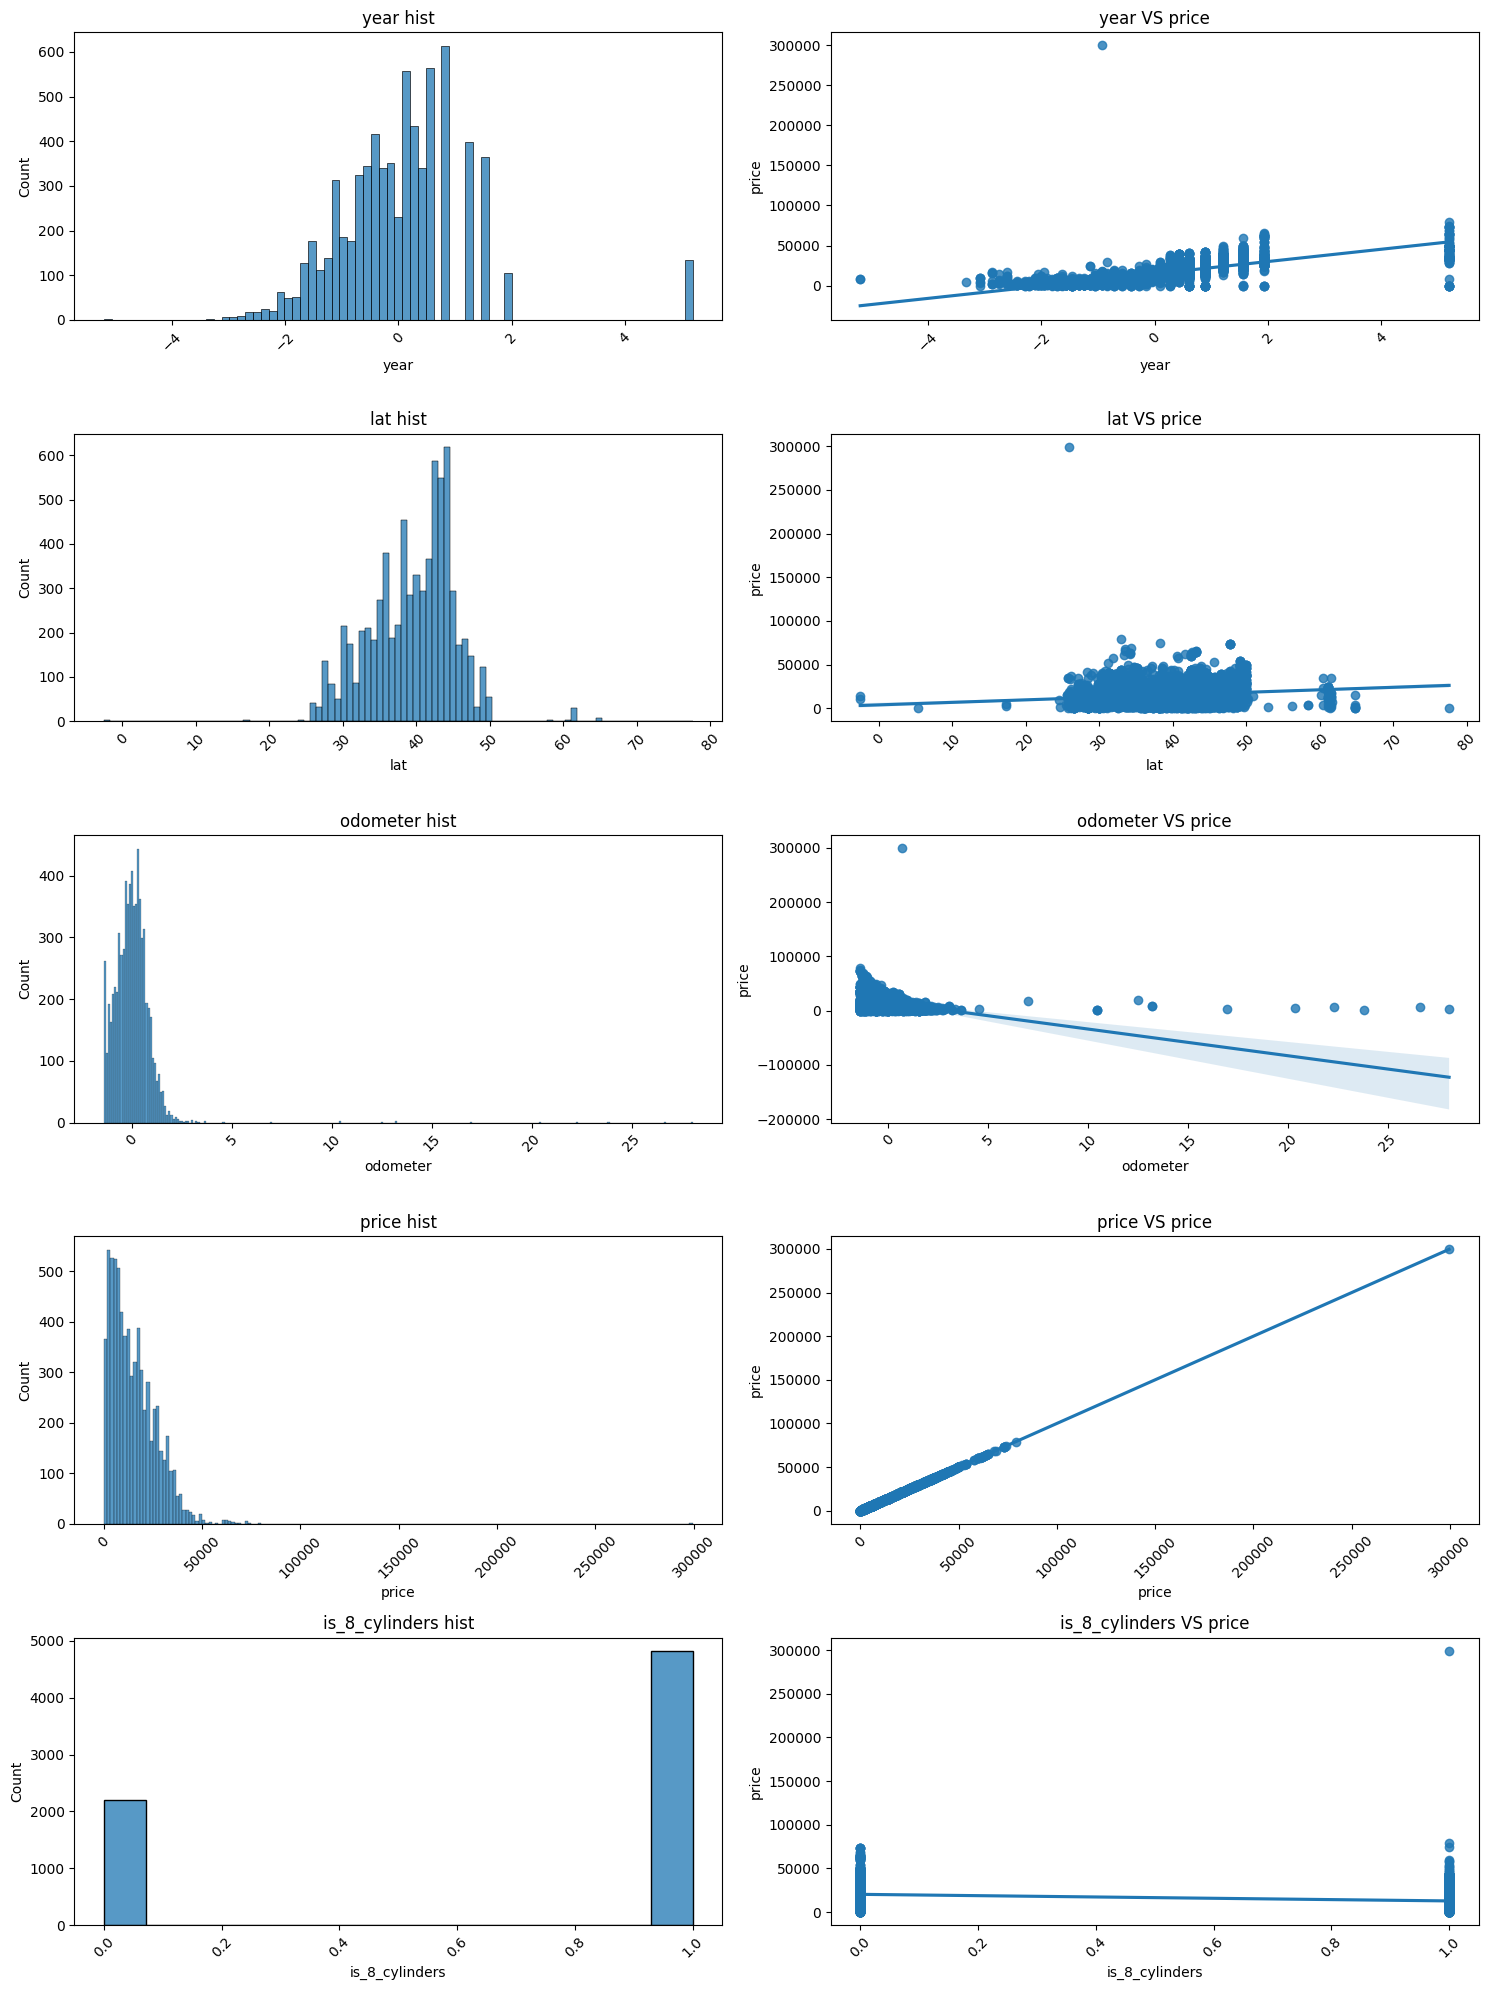

In [230]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

#Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=data, x=feature, y='price', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS price'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

## <center> Моделирование

Заранее создадим функцию, которая будет расчитывать метрики:

1. MAE - средняя абсолютная ошибка (целевая метрика)
2. MAPE - средняя абсолютная ошибка в процентах 
3. $R^2$ - коэффициент детерминации 

In [231]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

### <center> Моделирование #1 по результатам **RFE**, признаки ['year', 'cylinders', 'lat']

Data Set #1

In [232]:
#удалим признак не входящий в "важные признаки" по RFE
data_set1= data.drop('odometer', axis=1)

#X - матрица наблюдений, y - столбец правильных ответов
X = data_set1.drop('price', axis=1)
y = data_set1['price']
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (5613, 3)
Test shape: (1404, 3)


In [233]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: -2.939
Train MAE: 8271.112
Train MAPE: 20177.569


Test R^2: -2.968
Test MAE: 7596.732
Train MAPE: 35145.609


### <center> Моделирование #2 по результатам **НА ОСНОВЕ ФИЛЬТРОВ**, признаки ['year', 'cylinders', 'odometer']

In [234]:
#удалим признак не входящий в "важные признаки" по RFE
data_set2= data.drop('lat', axis=1)

#X - матрица наблюдений, y - столбец правильных ответов
X = data_set2.drop('price', axis=1)
y = data_set2['price']
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (4911, 3)
Test shape: (2106, 3)


In [235]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: -2.193
Train MAE: 7801.159
Train MAPE: 24247.892


Test R^2: -1.291
Test MAE: 7081.780
Train MAPE: 27719.327
